# **Chapter 4. Python 을 활용한 데이터 시각화** 






---
### **학습 목표**
> 4-1. matplotlib 이란? <br>
> 4-2. matplotlib 구성 요소와 기본 그래프 <br>
> **4-3. matplotlib 그래프 유형 별 시각화** <br>
> 4-4. seaborn 이란? <br>
> 4-5. matplotlib 과 seaborn <br>
> 4-6. seaborn 그래프 유형 별 시각화 <br>
> 4-7. folium 이란? <br>
> 4-8. folium 기본 사용법 <br>
> 4-9. folium 지도 데이터 시각화 실습

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [ ]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## 4-3. matplotlib 그래프 유형 별 시각화

> - 이번 시간에는 matplotlib 에서 자주 사용되는 다음 그래프 유형을 알아보겠습니다.
    - 바 (**`bar`**),
    - 파이 (**`pie`**)
    - 히스토그램 (**`histogram`**)
    - 산점도 (**`scatter`**)
    - 그 밖의 그래프
        - 이미지 (**`imshow`**)
        - 3D 그래프 (**`surface`**)

In [25]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np

#한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

> ###  **4-3-1. 바 (bar)**


> - X 나 Y 중 **하나의 값이 카테고리형** 일 경우 바 (`bar`) 형태 차트가 효과적인 시각화 방법입니다. 
> - 가로 방향으로 그리려면 `barh` 로 그릴 수 있습니다.
> - 기본 사용법
    - **`plt.bar(x, y, color=['색상'], width='폭')`**

> **[bar] 기본형**

In [27]:
# 데이터 생성
x = np.arange(6)
y = [80, 70, 40, 90, 60,50]
xlabel = ['국어', '수학', '영어', '과학', '미술', '체육']
x

array([0, 1, 2, 3, 4, 5])

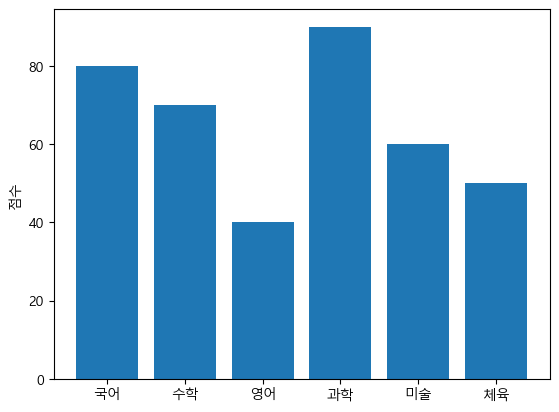

In [29]:
# plt.bar → 세로 막대
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.ylabel('점수')
plt.show()

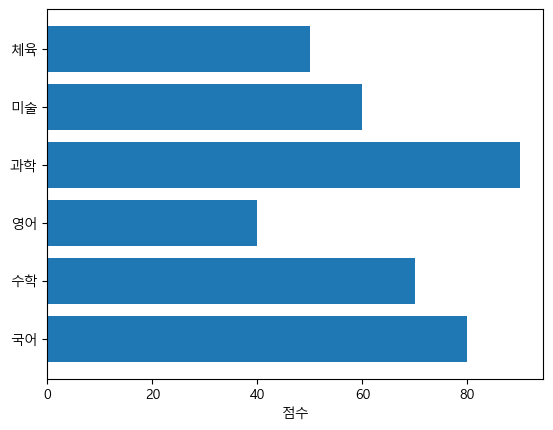

In [31]:
# plt.bar → 가로 막대
plt.barh(x, y)
plt.yticks(x, xlabel)
plt.xlabel('점수')
plt.show()

> **[bar] 여러개 그리기 (나란한 형태)**
> - 바의 **폭 크기를 지정**한 후, **수동으로 다음 그려질 그래프 위치를 지정**해 주어야 합니다.

In [37]:
# 데이터 생성
x = np.arange(5)
women = [80, 70, 40, 90, 60]
men = [70, 80, 45, 75, 80]
xlabel = ['국어', '수학', '영어', '과학', '미술']

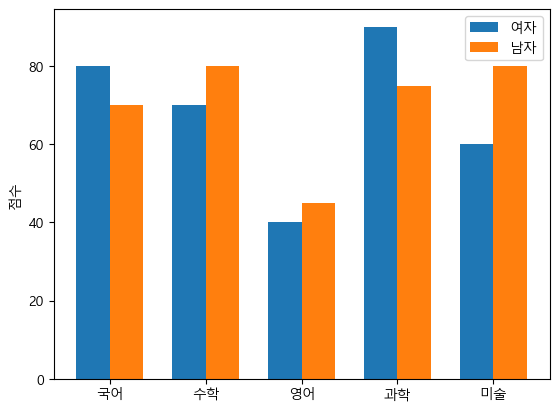

In [39]:
bar_width = 0.35                                            # 폭 설정
plt.bar(x, women, width=bar_width, label='여자')            
plt.bar(x + bar_width, men, width=bar_width, label='남자')  # 두번째 그래프 부터 '인덱스 + 폭' 위치에 플롯팅
plt.xticks(x + bar_width/2, xlabel)                         # x 축에 보여질 문구 위치
plt.ylabel('점수')
plt.legend(loc='upper right')
plt.show()

> **[bar] 여러개 그리기 (Stacked 형태)**
> - **`bottom` 옵션**을 사용해 겹쳐진 바 차트도 만들 수 있습니다.

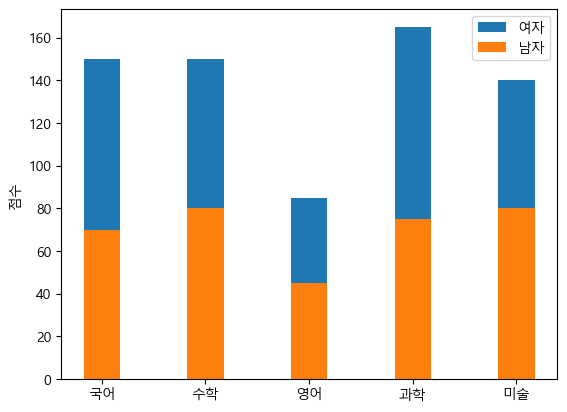

In [41]:
bar_width = 0.35  
plt.bar(x, women, width=bar_width, label='여자', bottom=men)    # 아래에 men 이 위치하도록 설정     
plt.bar(x, men, width=bar_width, label='남자')                    
plt.xticks(x, xlabel)                    
plt.ylabel('점수')
plt.legend(loc='upper right')
plt.show()

> ###  **4-3-2. 파이 (pie)**


> - 카테고리 별 값의 상대적인 비교를 할 경우, `pie` 차트가 선호됩니다. 
> - 기본 사용법
    - **`plt.pie(카테고리 값, color=['색상'], width='폭', explode='돌출 옵션')`**

In [43]:
# 데이터 생성
labels = ['애플', '삼성', '오포', '샤오미', '기타']
sizes = [16, 21, 16, 14, 33]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'lightgray']

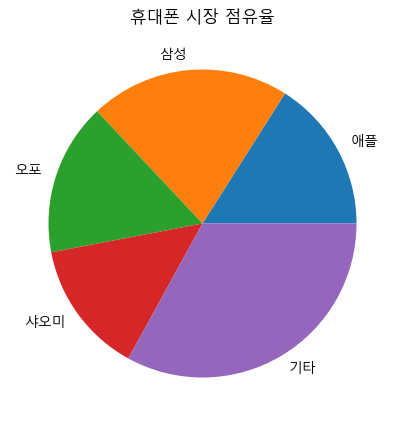

In [45]:
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels)
plt.title('휴대폰 시장 점유율')
plt.show()

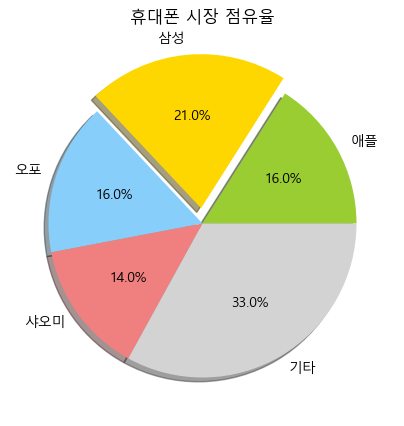

In [47]:
# 파이 돌출 옵션
explode = (0, 0.1, 0, 0, 0)

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%0.1f%%', shadow=True)
plt.title('휴대폰 시장 점유율')
plt.show()

> ###  **4-3-3. 히스토그램 (histogram)**


> - 빈도 분포가 어떻게 되어 있는지 확인을 위해서는, `hist` 차트가 선호됩니다. 
> - 기본 사용법
    - **`plt.hist('발생 빈도가 있는 값')`**

> **[hist] 기본형**

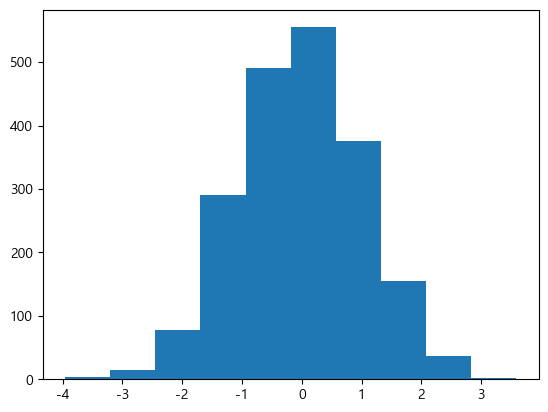

In [49]:
# 데이터 생성
x = np.random.randn(2000)
plt.hist(x)
plt.show()

> **[hist] bin 크기 지정**

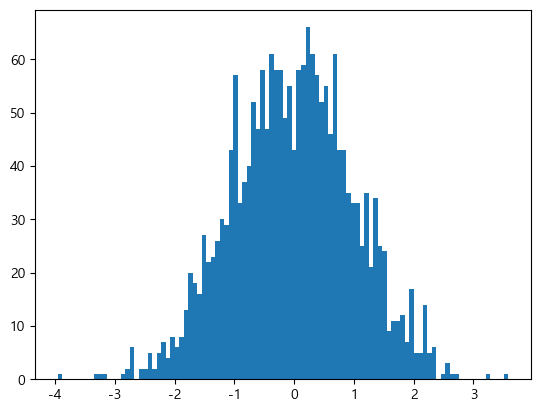

In [51]:
plt.hist(x, bins=100)
plt.show()

> **[hist] 누적 분포형**

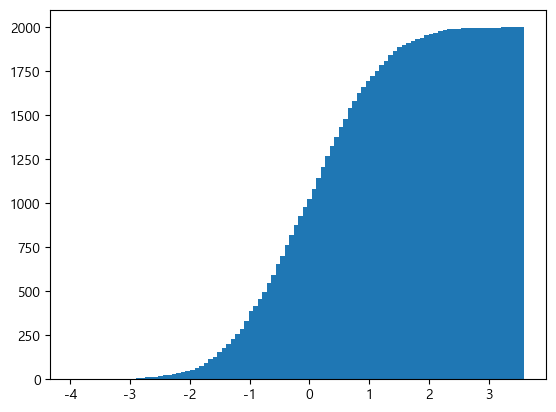

In [53]:
plt.hist(x, bins=100, cumulative=True)
plt.show()

> ###  **4-3-4. 산점도 (scatter)**


> - 두 데이터 집합의 상관관계를 확인할 때 자주 사용됩니다, `scatter` 명령으로 그릴 수 있습니다. 
> - 기본 사용법
    - **`plt.scatter(x, y)`**

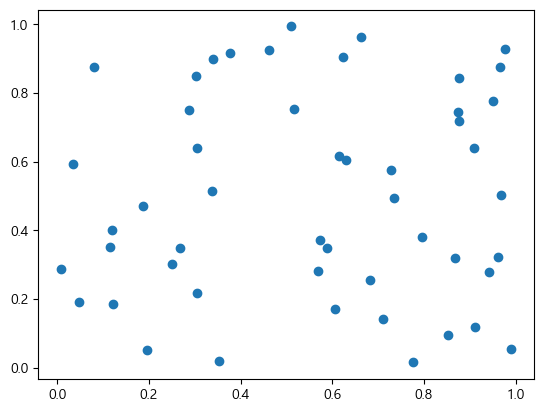

In [55]:
# 데이터 생성
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y)
plt.show()

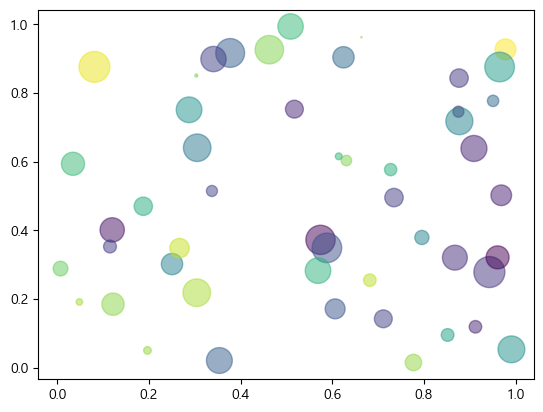

In [57]:
# 옵션 지정
colors = np.random.rand(50)
area = np.random.rand(50)*500

plt.scatter(x, y, sizes=area, c=colors, alpha=0.5)
plt.show()

> ###  **4-3-5. 그 밖의 그래프**
> - matplotlib 에서는 위에서 소개한 유형 밖에도 **정말 다양한 그래프형을 제공**합니다.
> - 이미지(`imshow`), 3D 그래프 (`surface`) 유형을 알아보겠습니다.


> **이미지 (imshow)**
> - 이미지 데이터는 **픽셀의 모음이 행과 열을 가진 2차원 데이터**입니다.
> - 기본 사용법
    - **`plt.imshow('2차원 픽셀 배열')`**

In [59]:
# 데이터 생성
from sklearn.datasets import load_digits
digits = load_digits()  # 0 부터 9 까지 숫자 이미지 데이터가 들어있습니다.
x = digits.images[0]

In [61]:
x

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

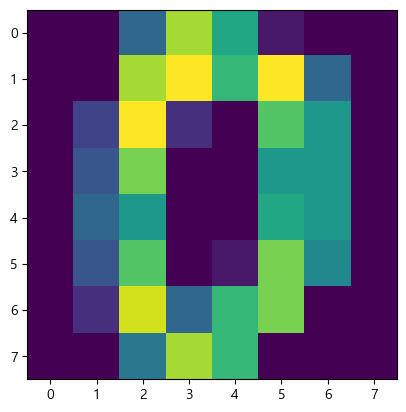

In [63]:
plt.imshow(x)
plt.show()

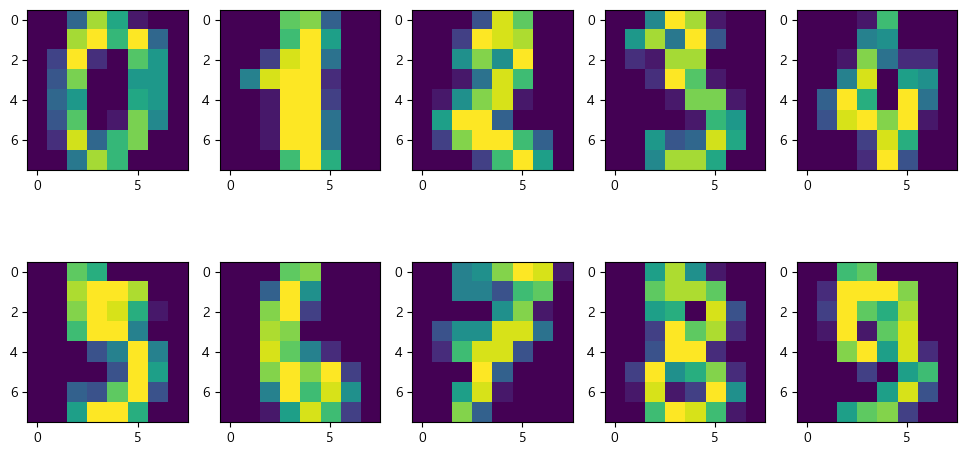

In [65]:
# 여러개 이미지 출력
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    axes[i//5][i%5].imshow(digits.images[i])
plt.show()

> **3D 그래프 (surface)**
> - 3차원 그래프는 일반 figure 와 달리, **3차원 전용 `axes` 를 생성**해서 입체적으로 표현합니다.
> - 기본 사용법
    - **`axes.plot_surface(x, y, z)`**

In [71]:
# 3차원 데이터 생성
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(50,150,24)
y = np.linspace(50,150,24)

x, y = np.meshgrid(x, y)     # x 와 y 의 shape 을 합칩니다.
z = (x-100)**2/y             # z 값 생성 (2차원 배열)

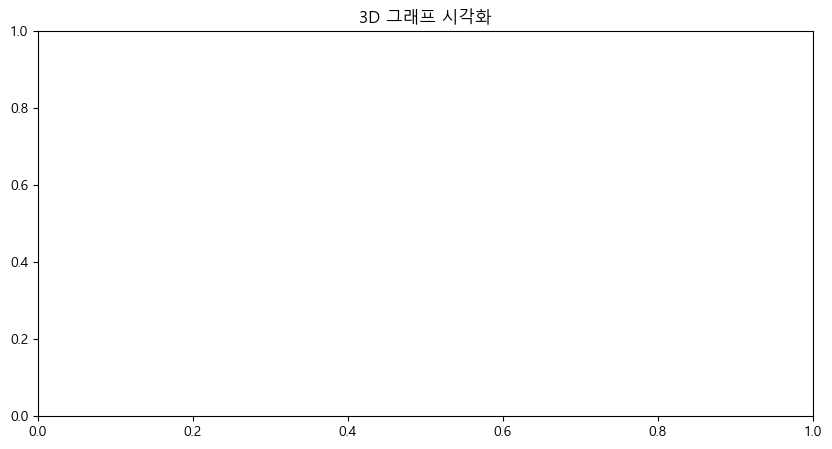

In [73]:
fig = plt.figure(figsize=(10, 5))
axes = Axes3D(fig)           # 3차원 axes 생성
axes.plot_surface(x, y, z, cmap='coolwarm')
plt.title('3D 그래프 시각화')
plt.show()